In [11]:
from glob import glob
import cv2 as cv
import matplotlib.pyplot as plt

In [12]:
f = glob('data/F5/Images/2/*')[10]
f

'data/F5/Images/2/20191108_102822.tiff'

In [13]:
import cv2 as cv
import sys
img = cv.imread(f, cv.IMREAD_ANYDEPTH)

In [14]:
img = img.astype('float32')
img -= img.min()
img /= img.max()
img;

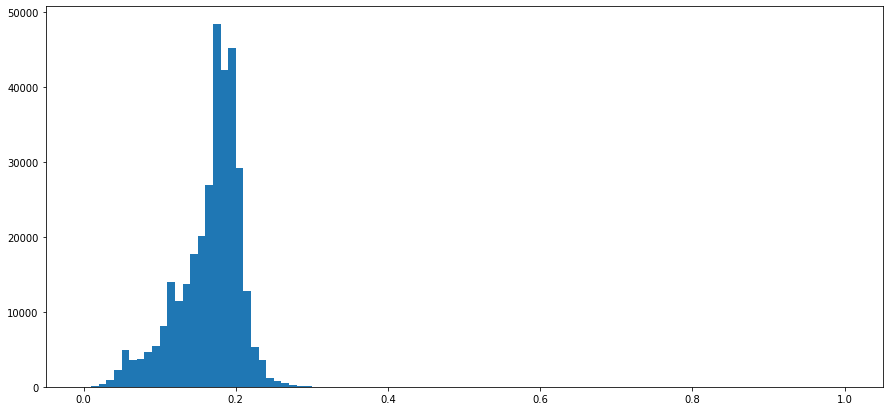

In [15]:
plt.figure(figsize=(15,7))
plt.hist(img.reshape(-1), bins=100); plt.show()

In [ ]:
if img is None:
    sys.exit("Could not read the image.")
cv.imshow("Displasy window", img)
k = cv.waitKey(0)
if k == ord("s"):
    cv.imwrite("starry_night.png", img)
if k == ord('q'):
    cv.destroyAllWindows()  

In [10]:
cap = cv.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (640,  480))

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break
        
    # write the frame
    out.write(frame)
# When everything done, release the capture
cap.release()
out.release()
cv.destroyAllWindows()